In [1]:
import pandas as pd
from deepface import DeepFace

In [2]:
df = pd.read_csv('../../dataset/Labeled Faces in the Wild Dataset/master.csv')
df.head()

,file_x,file_y,Decision
0,img20.jpg,img21.jpg,Yes
1,img16.jpg,img17.jpg,Yes
2,img3.jpg,img12.jpg,Yes
3,img22.jpg,img23.jpg,Yes
4,img24.jpg,img25.jpg,Yes


In [3]:
df['file_x'] = '../../dataset/Labeled Faces in the Wild Dataset/' + df['file_x'].astype(str)
df['file_y'] = '../../dataset/Labeled Faces in the Wild Dataset/' + df['file_y'].astype(str)

In [4]:
instances = df[["file_x", "file_y"]].values.tolist()
instances

[['../../dataset/Labeled Faces in the Wild Dataset/img20.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img21.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img16.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img17.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img3.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img12.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img22.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img23.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img24.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img25.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img1.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img2.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img1.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img4.jpg'],
 ['../../dataset/Labeled Faces in the Wild Dataset/img1.jpg',
  '../../dataset/Labeled Faces in the Wild Dataset/img

In [5]:
model_name = "OpenFace"
distance_metric = "cosine"

In [6]:
resp_obj = DeepFace.verify(instances, model_name = model_name, distance_metric = distance_metric)

Verification: 100%|██████████| 300/300 [15:42<00:00,  3.14s/it]


In [7]:
distances = []
for i in range(0, len(instances)):
    distance = round(resp_obj["pair_%s" % (i+1)]["distance"], 4)
    distances.append(distance)

In [8]:
df["distance"] = distances
df.head()

,file_x,file_y,Decision,distance
0,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,Yes,0.2172
1,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,Yes,0.3316
2,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,Yes,0.2178
3,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,Yes,0.0817
4,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,Yes,0.1779


<AxesSubplot:ylabel='Density'>

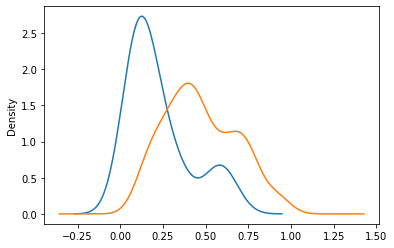

In [9]:
df[df.Decision == "Yes"].distance.plot.kde()
df[df.Decision == "No"].distance.plot.kde()

In [10]:
from chefboost import Chefboost as chef

In [11]:
config = {'algorithm': 'C4.5'}

In [12]:
tmp_df = df[['distance', 'Decision']].rename(columns = {"decision": "Decision"}).copy()
model = chef.fit(tmp_df, config)

[INFO]:  2 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  0.4701194763183594  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  87.66666666666667 % on  300  instances
Labels:  ['Yes' 'No']
Confusion matrix:  [[1, 0], [37, 262]]
Precision:  100.0 %, Recall:  2.6316 %, F1:  5.1282 %


In [13]:
threshold = 0.0365 #comes from c4.5 algorithm

In [14]:
df["prediction"] = "No"

In [15]:
idx = df[df.distance <= threshold].index
df.loc[idx, 'prediction'] = 'Yes'

In [16]:
df.sample(5)

,file_x,file_y,Decision,distance,prediction
99,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,No,0.7003,No
74,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,No,0.3984,No
103,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,No,0.7230,No
272,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,No,0.3082,No
221,../../dataset/Labeled Faces in the Wild Datase...,../../dataset/Labeled Faces in the Wild Datase...,No,0.4856,No


In [17]:
from sklearn.metrics import confusion_matrix,roc_curve,auc

In [18]:
cm = confusion_matrix(df.Decision.values, df.prediction.values)

In [19]:
tn, fp, fn, tp = cm.ravel()

In [20]:
tn, fp, fn, tp

(262, 0, 37, 1)

In [21]:
recall = tp / (tp + fn)
precision = tp / (tp + fp)
accuracy = (tp + tn)/(tn + fp +  fn + tp)
f1 = 2 * (precision * recall) / (precision + recall)

In [22]:
print("Precision: ", 100*precision,"%")
print("Recall: ", 100*recall,"%")
print("F1 score ",100*f1, "%")
print("Accuracy: ", 100*accuracy,"%")

Precision:  100.0 %
Recall:  2.631578947368421 %
F1 score  5.128205128205128 %
Accuracy:  87.66666666666667 %
